# Trial durations new bigger box vs old boxes

In [1]:
import sys
sys.path.append('/Users/shayneufeld/GitHub/mouse_bandit/data_preprocessing_code')
sys.path.append('/Users/shayneufeld/GitHub/mouse_bandit')
import support_functions as sf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sp
import bandit_preprocessing as bp
import os
%matplotlib inline 

## Load in record

In [2]:
record = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/session_record.csv',index_col=0)

In [3]:
q43_ = record[(((record['Mouse ID']=='q43') |(record['Mouse ID']=='Q43')) & (record['p(high Port)'] > 0))].copy()
q45_ = record[(((record['Mouse ID']=='q45') |(record['Mouse ID']=='Q45')) & (record['p(high Port)'] > 0))].copy()
q43 = q43_.loc[623:].copy()
q45 = q45_.loc[644:].copy()

In [4]:
data = q45.append(q43)

## Load in trial matrices

In [5]:
'''
load in trial data
'''

#let's just start with 03312017
session_names = ['03152017_Q43','03152017_Q45','04032017_Q43','04032017_Q45']

columns = ['Elapsed Time (s)','Since last trial (s)','Trial Duration (s)','Port Poked','Right Reward Prob','Left Reward Prob','Reward Given']

root_dir = '/Users/shayneufeld/GitHub/mouse_bandit/data/trial_data'

trial_df = []

for session in session_names:
    full_name = session + '_trials.csv'
    
    path_name = os.path.join(root_dir,full_name)
    
    trial_df.append(pd.read_csv(path_name,names=columns))

mouse_ids = ['q43','q45','q43','q45']

In [6]:
for i,df in enumerate(trial_df):
    
    curr_feature_matrix = bp.create_reduced_feature_matrix(df,mouse_ids[i],session_names[i],feature_names='Default',curr_trial_duration=True)
    
    if i == 0:
        master_matrix = curr_feature_matrix.copy()
    else:
        master_matrix = master_matrix.append(curr_feature_matrix)

In [7]:
master_matrix

,Mouse ID,Session ID,Block Trial,Port Streak,Reward Streak,Trial Duration,Decision,Switch,Higher p port,Reward
0,q43,03152017_Q43,0.0,0.0,0.0,0.613,1.0,0.0,0.0,0.0
1,q43,03152017_Q43,1.0,1.0,-1.0,0.565,0.0,1.0,1.0,1.0
2,q43,03152017_Q43,2.0,1.0,1.0,0.422,0.0,0.0,1.0,0.0
3,q43,03152017_Q43,3.0,2.0,-1.0,0.480,0.0,0.0,1.0,1.0
4,q43,03152017_Q43,4.0,3.0,1.0,0.550,0.0,0.0,1.0,0.0
5,q43,03152017_Q43,5.0,4.0,-1.0,0.417,1.0,1.0,0.0,0.0
6,q43,03152017_Q43,6.0,1.0,-2.0,0.326,1.0,0.0,0.0,0.0
7,q43,03152017_Q43,7.0,2.0,-3.0,0.676,0.0,1.0,1.0,1.0
8,q43,03152017_Q43,8.0,1.0,1.0,0.448,0.0,0.0,1.0,1.0
9,q43,03152017_Q43,9.0,2.0,2.0,0.408,0.0,0.0,1.0,0.0


# Add column for which box the mouse was in

In [12]:
master_matrix.index = np.arange(master_matrix.shape[0])

inds = master_matrix[master_matrix['Session ID'] == '03152017_Q43'].index.values
master_matrix.loc[inds,'Box'] = 'small'

inds = master_matrix[master_matrix['Session ID'] == '03152017_Q45'].index.values
master_matrix.loc[inds,'Box'] = 'small'

inds = master_matrix[master_matrix['Session ID'] == '04032017_Q43'].index.values
master_matrix.loc[inds,'Box'] = 'big'

inds = master_matrix[master_matrix['Session ID'] == '04032017_Q45'].index.values
master_matrix.loc[inds,'Box'] = 'big'

In [13]:
master_matrix.head(5)

,Mouse ID,Session ID,Block Trial,Port Streak,Reward Streak,Trial Duration,Decision,Switch,Higher p port,Reward,Box
0,q43,03152017_Q43,0.0,0.0,0.0,0.613,1.0,0.0,0.0,0.0,small
1,q43,03152017_Q43,1.0,1.0,-1.0,0.565,0.0,1.0,1.0,1.0,small
2,q43,03152017_Q43,2.0,1.0,1.0,0.422,0.0,0.0,1.0,0.0,small
3,q43,03152017_Q43,3.0,2.0,-1.0,0.480,0.0,0.0,1.0,1.0,small
4,q43,03152017_Q43,4.0,3.0,1.0,0.550,0.0,0.0,1.0,0.0,small


# Hist of trial durations

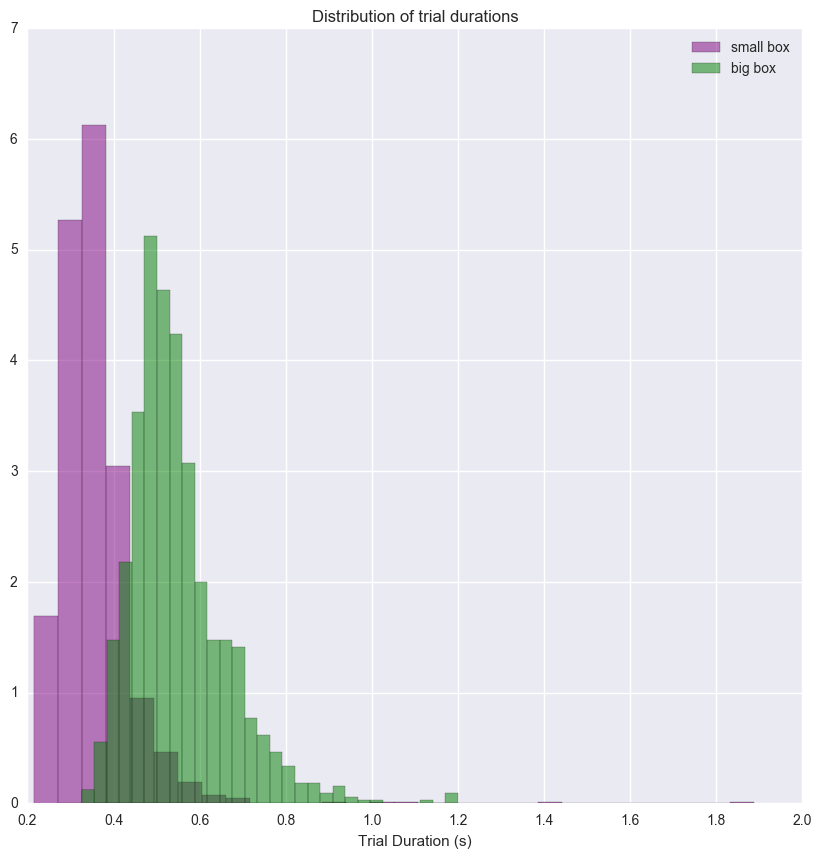

In [20]:
plt.figure(figsize=(10,10))
plt.hist(master_matrix[master_matrix['Box']=='small']['Trial Duration'].values,bins=30,color='purple',label = 'small box',alpha=0.5,normed=True)
plt.hist(master_matrix[master_matrix['Box']=='big']['Trial Duration'].values,bins=30,color='green',label = 'big box',alpha=0.5,normed=True)
plt.title('Distribution of trial durations')
plt.xlabel('Trial Duration (s)')
plt.legend(loc = 'upper right')

Number of stays:switches in small box: 1122 : 86
Number of stays:switches in big box: 1014 : 104


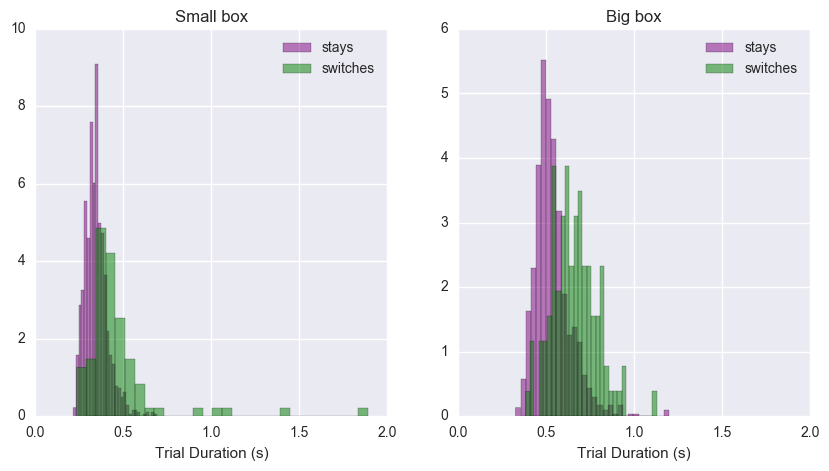

In [28]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.hist(master_matrix[((master_matrix['Box']=='small') & (master_matrix['Switch'] == 0))]['Trial Duration'].values,bins=30,color='purple',label = 'stays',alpha=0.5,normed=True)
plt.hist(master_matrix[((master_matrix['Box']=='small') & (master_matrix['Switch'] == 1))]['Trial Duration'].values,bins=30,color='green',label = 'switches',alpha=0.5,normed=True)
plt.title('Small box')
plt.xlabel('Trial Duration (s)')
plt.legend(loc = 'upper right')
plt.xlim(0,2)

plt.subplot(122)
plt.hist(master_matrix[((master_matrix['Box']=='big') & (master_matrix['Switch'] == 0))]['Trial Duration'].values,bins=30,color='purple',label = 'stays',alpha=0.5,normed=True)
plt.hist(master_matrix[((master_matrix['Box']=='big') & (master_matrix['Switch'] == 1))]['Trial Duration'].values,bins=30,color='green',label = 'switches',alpha=0.5,normed=True)
plt.title('Big box')
plt.xlabel('Trial Duration (s)')
plt.legend(loc = 'upper right')
plt.xlim(0,2)

print('Number of stays:switches in small box: %.0f : %.0f' % 
      (master_matrix[((master_matrix['Box']=='small') & (master_matrix['Switch'] == 0))].shape[0],
       master_matrix[((master_matrix['Box']=='small') & (master_matrix['Switch'] == 1))].shape[0]))

print('Number of stays:switches in big box: %.0f : %.0f' % 
      (master_matrix[((master_matrix['Box']=='big') & (master_matrix['Switch'] == 0))].shape[0],
       master_matrix[((master_matrix['Box']=='big') & (master_matrix['Switch'] == 1))].shape[0]))

(0, 2)

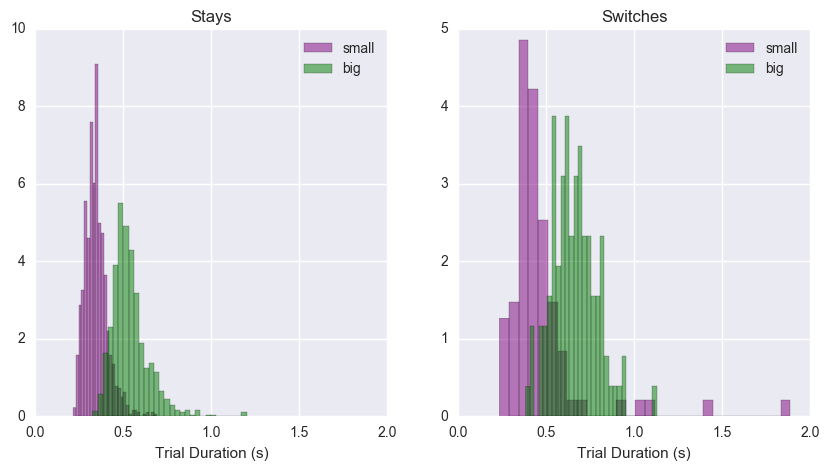

In [30]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.hist(master_matrix[((master_matrix['Box']=='small') & (master_matrix['Switch'] == 0))]['Trial Duration'].values,bins=30,color='purple',label = 'small',alpha=0.5,normed=True)
plt.hist(master_matrix[((master_matrix['Box']=='big') & (master_matrix['Switch'] == 0))]['Trial Duration'].values,bins=30,color='green',label = 'big',alpha=0.5,normed=True)
plt.title('Stays')
plt.xlabel('Trial Duration (s)')
plt.legend(loc = 'upper right')
plt.xlim(0,2)

plt.subplot(122)
plt.hist(master_matrix[((master_matrix['Box']=='small') & (master_matrix['Switch'] == 1))]['Trial Duration'].values,bins=30,color='purple',label = 'small',alpha=0.5,normed=True)
plt.hist(master_matrix[((master_matrix['Box']=='big') & (master_matrix['Switch'] == 1))]['Trial Duration'].values,bins=30,color='green',label = 'big',alpha=0.5,normed=True)
plt.title('Switches')
plt.xlabel('Trial Duration (s)')
plt.legend(loc = 'upper right')
plt.xlim(0,2)